# Viewpoint exersise part 2 for the Data Enginner Position

## Part 2.1

Both of the given dataset links were not valid, so I tried to find Congress_White_house dataset myself.

In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


#### Dataset stats

In this notebooks, I created a small end-to-end machine learning pipeline. So, I tried to check whether there is a correlation between Employee Status, Position and the Salary. 


After the analysis we will see that Employee status has only 3 unique values, which is unlikely to be enough to estimate the salary of an employee. When Employee position contains 269 unique values, and it might has a better correlation with salary.

Pay Basis is the same for all the employees in the dataset, so there is no point in considering it.


In [76]:
PATH_TO_CSV = '2010_Report_to_Congress_on_White_House_Staff.csv'
df  = pd.read_csv(PATH_TO_CSV)
df.head()

,Employee Name,Employee Status,Salary,Pay Basis,Position Title
0,"Abrams, Adam W.",Employee,$66300.00,Per Annum,WESTERN REGIONAL COMMUNICATIONS DIRECTOR
1,"Adams, Ian H.",Employee,$45000.00,Per Annum,EXECUTIVE ASSISTANT TO THE DIRECTOR OF SCHEDUL...
2,"Agnew, David P.",Employee,$93840.00,Per Annum,DEPUTY DIRECTOR OF INTERGOVERNMENTAL AFFAIRS
3,"Albino, James",Employee,$91800.00,Per Annum,SENIOR PROGRAM MANAGER
4,"Aldy, Jr., Joseph E.",Employee,$130500.00,Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT FOR ENERGY ...


The dataset contains 469 rows in total, and we select only two features (Employee status and Position). We want to convert their categories to numbers before training the model.

In addition to that, we need to remove '$' from the salary and convert it to float.

In [77]:
df.describe()

,Employee Name,Employee Status,Salary,Pay Basis,Position Title
count,469,469,469,469,469
unique,469,3,120,1,269
top,"Mattson, Philip C.",Employee,$42000.00,Per Annum,STAFF ASSISTANT
freq,1,437,64,469,24


The dataset does not contain either nulls or nans, so we do not have to worry about them.

In [78]:
df.isnull().any()

Employee Name      False
Employee Status    False
Salary             False
Pay Basis          False
Position Title     False
dtype: bool

In [79]:
df.isna().any()

Employee Name      False
Employee Status    False
Salary             False
Pay Basis          False
Position Title     False
dtype: bool

#### Data Preparation

We converting the target variable to float32 and encode Employee Status and Position with one-hot encoding.

In [81]:
X = pd.get_dummies(df[['Employee Status','Position Title']], columns=['Employee Status','Position Title'])
y = df['Salary'].apply(lambda salary: np.float32(salary.replace('$','')))

After encoding, we have expanded our single column into 3 one-hot encoded columns (Detailee, Employee, Employee (part-time)).

In [82]:
X.head()

,Employee Status_Detailee,Employee Status_Employee,Employee Status_Employee (part-time),Position Title_ADVANCE COORDINATOR,Position Title_ADVISOR,Position Title_ANALYST,Position Title_ASSISTANT COUNSEL FOR NOMINATIONS,Position Title_ASSISTANT DIRECTOR,Position Title_ASSISTANT EXECUTIVE CLERK,Position Title_ASSISTANT PRESS SECRETARY,Position Title_ASSISTANT SHIFT LEADER,Position Title_ASSISTANT SPEECHWRITER,Position Title_ASSISTANT STAFF SECRETARY,Position Title_ASSISTANT SUPERVISOR OF CLASSIFICATION,Position Title_ASSISTANT SUPERVISOR OF SEARCH AND FILE,"Position Title_ASSISTANT SUPERVISOR, DOCUMENT MANAGEMENT AND TRACKING UNIT",Position Title_ASSISTANT TO THE EXECUTIVE CLERK,Position Title_ASSISTANT TO THE PRESIDENT AND CABINET SECRETARY,Position Title_ASSISTANT TO THE PRESIDENT AND CHIEF OF STAFF,Position Title_ASSISTANT TO THE PRESIDENT AND COUNSEL TO THE PRESIDENT,Position Title_ASSISTANT TO THE PRESIDENT AND DEPUTY CHIEF OF STAFF FOR OPERATIONS,Position Title_ASSISTANT TO THE PRESIDENT AND DEPUTY CHIEF OF STAFF FOR POLICY,Position Title_ASSISTANT TO THE PRESIDENT AND DEPUTY NATIONAL SECURITY ADVISOR,Position Title_ASSISTANT TO THE PRESIDENT AND DIRECTOR OF COMMUNICATIONS,Position Title_ASSISTANT TO THE PRESIDENT AND DIRECTOR OF POLITICAL AFFAIRS,Position Title_ASSISTANT TO THE PRESIDENT AND DIRECTOR OF SCHEDULING AND ADVANCE,Position Title_ASSISTANT TO THE PRESIDENT AND DIRECTOR OF SPEECHWRITING,Position Title_ASSISTANT TO THE PRESIDENT AND DIRECTOR OF THE DOMESTIC POLICY COUNCIL,"Position Title_ASSISTANT TO THE PRESIDENT AND DIRECTOR, OFFICE OF LEGISLATIVE AFFAIRS",Position Title_ASSISTANT TO THE PRESIDENT AND PRESS SECRETARY,Position Title_ASSISTANT TO THE PRESIDENT AND SENIOR ADVISOR,Position Title_ASSISTANT TO THE PRESIDENT AND STAFF SECRETARY,Position Title_ASSISTANT TO THE PRESIDENT FOR ECONOMIC POLICY AND DIRECTOR OF THE NATIONAL ECONOMIC COUNCIL,Position Title_ASSISTANT TO THE PRESIDENT FOR ENERGY AND CLIMATE CHANGE,Position Title_ASSISTANT TO THE PRESIDENT FOR HOMELAND SECURITY AND COUNTERTERRORISM,Position Title_ASSISTANT TO THE PRESIDENT FOR MANAGEMENT AND ADMINISTRATION,Position Title_ASSISTANT TO THE PRESIDENT FOR SPECIAL PROJECTS,"Position Title_ASSISTANT TO THE PRESIDENT, CHIEF OF STAFF TO THE FIRST LADY AND COUNSEL",Position Title_ASSOCIATE COUNSEL TO THE PRESIDENT,Position Title_ASSOCIATE DIRECTOR,...,Position Title_SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTOR OF MESSAGE EVENTS,Position Title_SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTOR OF NEW MEDIA,Position Title_SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTOR OF PRESIDENTIAL CORRESPONDENCE,Position Title_SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTOR OF RESEARCH,Position Title_SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTOR OF WHITE HOUSE OPERATIONS,"Position Title_SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTOR, OFFICE OF THE CHIEF OF STAFF",Position Title_SPECIAL ASSISTANT TO THE PRESIDENT AND EXECUTIVE DIRECTOR OF THE WHITE HOUSE OFFICE OF FAITH-BASED AND NEIGHBORHOOD PARTNERSHIPS,Position Title_SPECIAL ASSISTANT TO THE PRESIDENT AND PERSONAL AIDE TO THE PRESIDENT,Position Title_SPECIAL ASSISTANT TO THE PRESIDENT AND SENIOR ADVISOR TO THE CHIEF OF STAFF,Position Title_SPECIAL ASSISTANT TO THE PRESIDENT AND SENIOR PRESIDENTIAL SPEECHWRITER,Position Title_SPECIAL ASSISTANT TO THE PRESIDENT AND SPECIAL COUNSEL TO THE PRESIDENT,Position Title_SPECIAL ASSISTANT TO THE PRESIDENT AND TRIP DIRECTOR,Position Title_SPECIAL ASSISTANT TO THE PRESIDENT FOR ECONOMIC POLICY,Position Title_SPECIAL ASSISTANT TO THE PRESIDENT FOR ECONOMIC POLICY AND CHIEF OF STAFF OF THE NATIONAL ECONOMIC COUNCIL,Position Title_SPECIAL ASSISTANT TO THE PRESIDENT FOR EDUCATION POLICY,Position Title_SPECIAL ASSISTANT TO THE PRESIDENT FOR ENERGY AND ENVIRONMENT,Position Title_SPECIAL ASSISTANT TO THE PRESIDENT FOR FINANCIAL MARKETS,Position Title_SPECIAL ASSISTANT TO THE PRESIDENT FOR HEALTHCARE AND ECONOMIC POLICY,Position Title_SPECIAL ASSISTANT TO THE PRESIDENT FOR INTERNATIONA

Let's check the distribution of the target variable.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


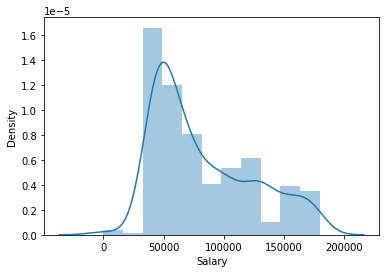

In [83]:
sns.distplot(y)

Normalizing the target variable will speed up the training.

In [92]:
y = (y -y.min())/y.max()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


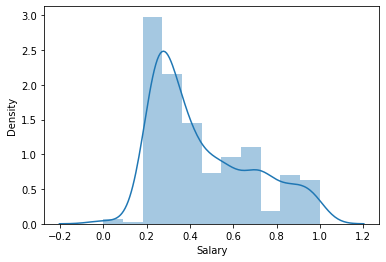

In [93]:
sns.distplot(y)

Now we can split the data to train and test datasets.

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [95]:
X_train.shape, X_test.shape

((375, 272), (94, 272))

#### Train the model

For simplicity, I am going to use LiniarRegression.

In [96]:
#creating the model
lr=LinearRegression()

In [97]:
# Fit the model
lr.fit(X_train,y_train)

LinearRegression()

#### Test the model

In [98]:
y_pred=lr.predict(X_test)
y_pred.shape

(94,)

Now we can check the model performance

MAE: 1843746174964.9534


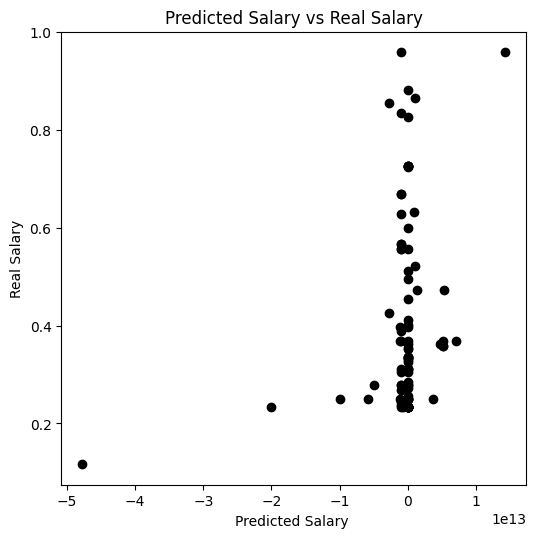

In [99]:

test_mae = metrics.mean_absolute_error(y_pred,y_test)
plt.figure(figsize=(6,6),dpi=100)
plt.scatter(y_pred,y_test,  color='black')
plt.title('Predicted Salary vs Real Salary')
plt.xlabel('Predicted Salary ')
plt.ylabel('Real Salary')
print(f'MAE: {test_mae}')
plt.show()

Basing on the results, there is no strong correlation between the selected features and the target variable. 

## Part 2.2

In [100]:
df2 = pd.read_csv('/content/data.csv',header=None)

In [101]:
df2.head()

,0,1
0,0,23.827290
1,1,23.589108
2,2,24.529556
3,3,16.684580
4,4,22.075507


In [102]:
df2.describe()

,0,1
count,10000.00000,10000.000000
mean,4999.50000,23.036075
std,2886.89568,2.995296
min,0.00000,11.248686
25%,2499.75000,21.007801
50%,4999.50000,23.024042
75%,7499.25000,25.069083
max,9999.00000,33.286533


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


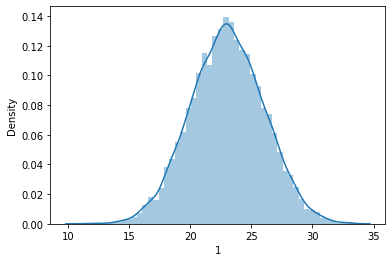

In [103]:
sns.distplot(df2[1])

We can see that the distribution resembles a bell curve (normal distribution) with the mean around 23 and the std around 3. Most of the values are concentrated beetween 15 and 30 with some outliers around 10 and 35. 